# LAB 10 : Restricted Boltzmann Machine

Name : 

Roll Number :

References : 

1. MNIST Dataset : http://yann.lecun.com/exdb/mnist/
2. Movie Lens Dataset : https://grouplens.org/datasets/movielens/
3. https://towardsdatascience.com/restricted-boltzmann-machine-how-to-create-a-recommendation-system-for-movie-review-45599a406deb
4. https://towardsdatascience.com/restricted-boltzmann-machine-as-a-recommendation-system-for-movie-review-part-2-9a6cab91d85b
5. https://github.com/echen/restricted-boltzmann-machines

#**Problem 1** : MNIST Digit Classification using RBM + Logistic Regression 

1. Consider MNIST Digit Dataset
2. Use the Bernoulli RBM API from Sci-kit learn package and create a pipeline of RBM network and logistic regression to classify the digits

##Write down the Objectives, Hypothesis and Experimental description for the above problem


## Objective 
To study the Restricted Boltzmann Machine for digit classification with logistic regression

## Description

A restricted Boltzmann machine (RBM) is a generative stochastic artificial neural network that can learn a probability distribution over its set of inputs. 

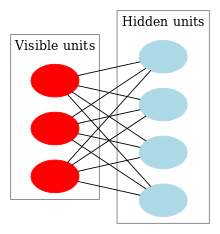

cfc031033f9ef72633258c4d8a7bbdbbecfd01ba.svg

rbm equation.svg

db7e1fea4efec3029a3cdae484da4747eeac3706.svg

1 pixel shifts in your input image can dramatically hurt the performance of your classifier.

This are not noticable by human eye.

This 1 pixel shift affects performance of RBM and can studied.

## Programming : 
  Please write a program to demonstrate the same

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.base import clone
from keras.datasets import mnist

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       490
           1       0.99      0.98      0.98       568
           2       0.92      0.92      0.92       516
           3       0.91      0.91      0.91       505
           4       0.92      0.92      0.92       491
           5       0.92      0.88      0.90       446
           6       0.94      0.94      0.94       479
           7       0.95      0.91      0.93       514
           8       0.90      0.92      0.91       487
           9       0.88      0.91      0.90       504

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       490
           1       0.95      0.97      0.96  

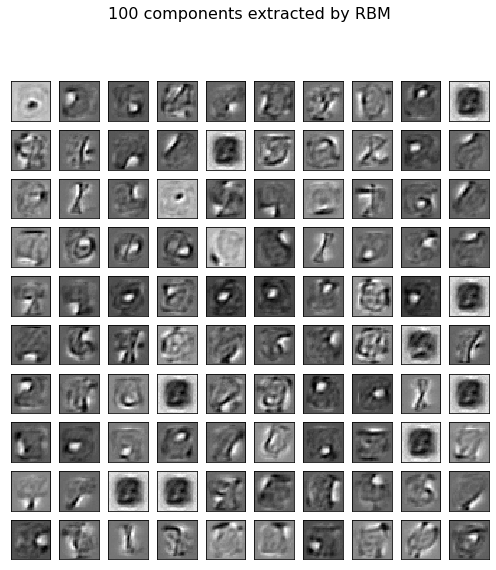

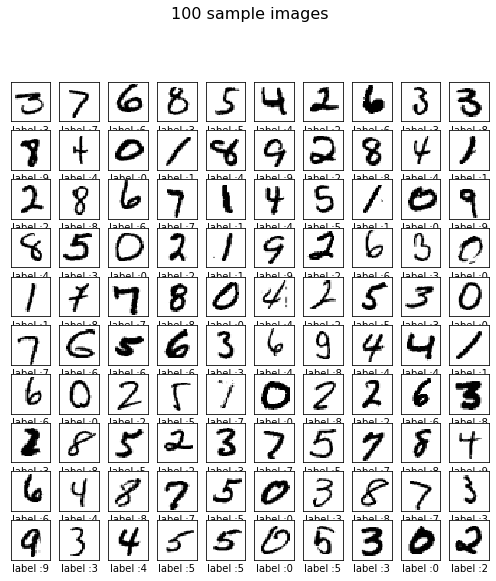

In [18]:
# Load Data
# X, y = datasets.load_digits(return_X_y=True)
# X = np.asarray(X, "float32")
# # X, Y = nudge_dataset(X, y)
# X = minmax_scale(X, feature_range=(0, 1))  # 0-1 scaling

# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(X1, Y1), (X2, Y2) = mnist.load_data()
X_1, X_2, Y_train, Y_2 = train_test_split(X1, Y1, stratify=Y1, test_size=0.6)
X_3, X_4, Y_3, Y_test = train_test_split(X2, Y2, stratify=Y2, test_size=0.5)
X_train = X_1.reshape(X_1.shape[0], 784)
X_test = X_4.reshape(X_4.shape[0], 784)
X_train = minmax_scale(X_train, feature_range=(0, 1))  # 0-1 scaling
X_test = minmax_scale(X_test, feature_range=(0, 1))  # 0-1 scaling
# Models we will use
logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=False)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

Y_pred_rbm = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred_rbm))
)

Y_pred_raw = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred_raw))
)

# #############################################################################
# Plotting

plt.figure(figsize=(8, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.figure(figsize=(8, 8))
for i, comp in enumerate(X_test):
    if i == 100:
      break
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xlabel('label :'+str(Y_pred_rbm[i]))
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 sample images", fontsize=16)
# plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2450
           1       0.97      0.98      0.98      2835
           2       0.91      0.92      0.92      2580
           3       0.87      0.88      0.88      2525
           4       0.95      0.90      0.93      2455
           5       0.88      0.88      0.88      2230
           6       0.95      0.96      0.95      2395
           7       0.94      0.89      0.92      2570
           8       0.86      0.88      0.87      2435
           9       0.87      0.89      0.88      2525

    accuracy                           0.92     25000
   macro avg       0.92      0.92      0.92     25000
weighted avg       0.92      0.92      0.92     25000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2450
           1       0.94      0.97      0.96  

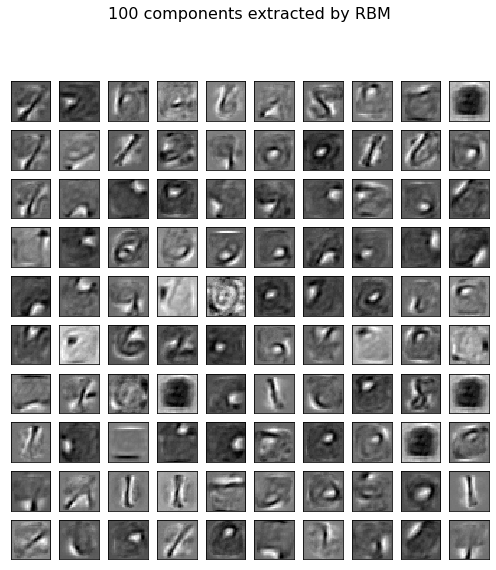

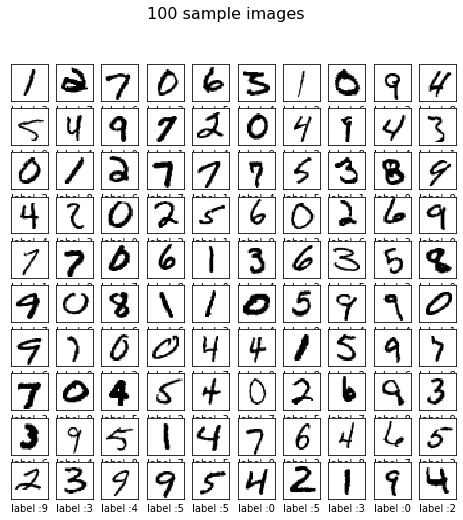

In [20]:
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 28x28 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 1, 0]],
    ]

    def shift(x, w):
        return convolve(x.reshape((28, 28)), mode="constant", weights=w).ravel()

    X = np.concatenate(
        [X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors]
    )
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y
# Load Data
(X1, Y1), (X2, Y2) = mnist.load_data()
X_1, X_2, Y_train, Y_2 = train_test_split(X1, Y1, stratify=Y1, test_size=0.6)
X_3, X_4, Y_3, Y_test = train_test_split(X2, Y2, stratify=Y2, test_size=0.5)
X_train = X_1.reshape(X_1.shape[0], 784)
X_test = X_4.reshape(X_4.shape[0], 784)

X_train, Y_train = nudge_dataset(X_train, Y_train)
X_test, Y_test = nudge_dataset(X_test, Y_test)

X_train = minmax_scale(X_train, feature_range=(0, 1))  # 0-1 scaling
X_test = minmax_scale(X_test, feature_range=(0, 1))  # 0-1 scaling

# Models we will use
logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=False)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.1
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Y_pred = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

#############################################################################
# Plotting

plt.figure(figsize=(8, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 components extracted by RBM", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.figure(figsize=(8, 8))
for i, comp in enumerate(X_test):
    if i == 100:
      break
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xlabel('label :'+str(Y_pred_rbm[i]))
    plt.xticks(())
    plt.yticks(())
plt.suptitle("100 sample images", fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

## Inferences and Conclusion : State all the key observations and conclusion

For the original data set

1.   Accuracy of the classifier with raw pixel is fine (0.92)
2.   Accuracy of RBM pipeline is slightly higher than logistic classifier (0.94)

For pixel shifted data set

*   Accuracy of logistic classifier decreases drastically (0.78)
*   Accuracy of RBM pipeline is still same as above (0.93)



#**Problem 2** : RBM as a Recommendation System for Movie Review on Movie Lens Dataset

1. Use the Movie Lens Dataset, Split it into train-test set. Convert the ratings to Binary (The task is to predict if the user likes a movie or not) 
2. Build a RBM network, train the model and test it on the test set

##Write down the Objectives, Hypothesis and Experimental description for the above problem


## objective 

To implement RBM as Recommendation system

## Description

A large amount of movie rating data is given to build an RBM. The task is to predict if a user likes a movie as 1 or dislike as 0.



## Programming : 
  Please write a program to demonstrate the same

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable


## Binary data conversion

  convert rating 1-5 to binary 1 or 0, as the target is to predict like or not
    
  * if not rated, set to 0
  * if rate is 1 or 2, set as 0 dislike
  * if rate is >= 3, set as 1 like



##so this is to make input and output data consistent
training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 2] = 0
training_set[training_set >= 3] = 1

test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set >= 3] = 1

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Load the movies dataset and also pass header=None since files don't contain any headers
movies_df = pd.read_csv('/content/movies.dat', sep='::', header=None, engine='python', encoding='latin-1')
print(movies_df.head())
print('\n#######################################################################################\n')
# Load the ratings dataset
ratings_df = pd.read_csv('/content/ratings.dat', sep='::', header=None, engine='python')
print(ratings_df.head())


   0                                   1                             2
0  1                    Toy Story (1995)   Animation|Children's|Comedy
1  2                      Jumanji (1995)  Adventure|Children's|Fantasy
2  3             Grumpier Old Men (1995)                Comedy|Romance
3  4            Waiting to Exhale (1995)                  Comedy|Drama
4  5  Father of the Bride Part II (1995)                        Comedy

#######################################################################################

   0     1  2          3
0  1  1193  5  978300760
1  1   661  3  978302109
2  1   914  3  978301968
3  1  3408  4  978300275
4  1  2355  5  978824291


In [25]:
# Lets rename our columns in these data frames so we can convey their data better
movies_df.columns = ['MovieID', 'Title', 'Genres']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

# Verify the changes done to the dataframes
print(movies_df.head())
print('\n#######################################################################################\n')
print(ratings_df.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

#######################################################################################

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [26]:
# Data Correction and Formatting
print('The Number of Movies in Dataset', len(movies_df))

"""
- Our Movie ID's vary from 1 to 3952 while we have 3883 movies. 
- Due to this, we won't be able to index movies through their ID since we would get memory indexing errors. 
- To amend we can create a column that shows the spot in our list that particular movie is in:
"""

movies_df['List Index'] = movies_df.index
print(movies_df.head())
print('\n#######################################################################################\n')

# Merge movies_df with ratings_df by MovieID
merged_df = movies_df.merge(ratings_df, on='MovieID')

# Drop unnecessary columns
merged_df = merged_df.drop('Timestamp', axis=1).drop('Title', axis=1).drop('Genres', axis=1)

# Display the result
print(merged_df.head())
print('\n#######################################################################################\n')

# Lets Group up the Users by their user ID's
user_Group = merged_df.groupby('UserID')
print(user_Group.head())

The Number of Movies in Dataset 3883
   MovieID                               Title                        Genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

   List Index  
0           0  
1           1  
2           2  
3           3  
4           4  

#######################################################################################

   MovieID  List Index  UserID  Rating
0        1           0       1       5
1        1           0       6       4
2        1           0       8       4
3        1           0       9       5
4        1           0      10       5

#############################################################

In [27]:
"""
Formatting the data into input for the RBM. 
Store the normalized users ratings into a list of lists called trX.
"""

# Amount of users used for training
amountOfUsedUsers = 1000

# Creating the training list
trX = []

# For each user in the group
for userID, curUser in user_Group:

    # Create a temp that stores every movie's rating
    temp = [0]*len(movies_df)

    # For each movie in curUser's movie list
    for num, movie in curUser.iterrows():

        # Divide the rating by 5 and store it
        temp[movie['List Index']] = movie['Rating']/5.0

    # Add the list of ratings into the training list
    trX.append(temp)

    # Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1
print(trX)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
# Setting the models Parameters
hiddenUnits = 50
visibleUnits = len(movies_df)
tf.compat.v1.disable_eager_execution()
vb = tf.compat.v1.placeholder(tf.float32, [visibleUnits])  # Number of unique movies
hb = tf.compat.v1.placeholder(tf.float32, [hiddenUnits])  # Number of features were going to learn
W = tf.compat.v1.placeholder(tf.float32, [visibleUnits, hiddenUnits])  # Weight Matrix

# Phase 1: Input Processing
v0 = tf.compat.v1.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)  # Visible layer activation
h0 = tf.nn.relu(tf.sign(_h0 - tf.random.uniform(tf.shape(_h0))))  # Gibb's Sampling

# Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)  # Hidden layer activation
v1 = tf.nn.relu(tf.sign(_v1 - tf.random.uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [29]:
""" Set RBM Training Parameters """

# Learning rate
alpha = 1.0

# Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

# Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.compat.v1.to_float(tf.shape(v0)[0])

# Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

# Set the error function, here we use Mean Absolute Error Function
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

Instructions for updating:
Use `tf.cast` instead.


0.122849025
0.08259502
0.06779843
0.06045064
0.055808462
0.052615263
0.049990382
0.047214482
0.044689737
0.043489594
0.042529747
0.042199615
0.041605152
0.04112847
0.040623646


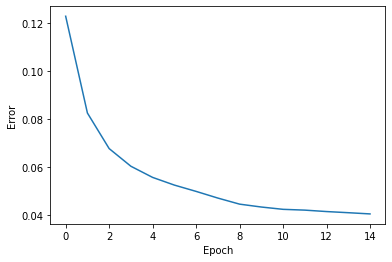

In [30]:
""" Initialize our Variables with Zeroes using Numpy Library """

# Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)

# Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)

# Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)

# Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

# Train RBM with 15 Epochs, with Each Epoch using 10 batches with size 100, After training print out the error by epoch
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip(range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
    print(errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [31]:
"""
Recommendation System :-
- We can now predict movies that an arbitrarily selected user might like. 
- This can be accomplished by feeding in the user's watched movie preferences into the RBM and then reconstructing the 
  input. 
- The values that the RBM gives us will attempt to estimate the user's preferences for movies that he hasn't watched 
  based on the preferences of the users that the RBM was trained on.
"""

# Select the input User
inputUser = [trX[50]]

# Feeding in the User and Reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})

# List the 20 most recommended movies for our mock user by sorting it by their scores given by our model.
scored_movies_df_50 = movies_df
scored_movies_df_50["Recommendation Score"] = rec[0]
print(scored_movies_df_50.sort_values(["Recommendation Score"], ascending=False).head(20))

      MovieID                                      Title  \
2789     2858                     American Beauty (1999)   
589       593           Silence of the Lambs, The (1991)   
2327     2396                 Shakespeare in Love (1998)   
604       608                               Fargo (1996)   
2693     2762                    Sixth Sense, The (1999)   
3091     3160                            Magnolia (1999)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
523       527                    Schindler's List (1993)   
3412     3481                       High Fidelity (2000)   
2530     2599                            Election (1999)   
1959     2028                 Saving Private Ryan (1998)   
1575     1617                   L.A. Confidential (1997)   
3441     3510                           Frequency (2000)   
108       110                          Braveheart (1995)   
2928     2997                Being John Malkovich (1999)   
315       318           Shawshank Redemp

In [32]:
""" Recommend User what movies he has not watched yet """

# Find the mock user's UserID from the data
print(merged_df.iloc[50])  # Result you get is UserID 150

# Find all movies the mock user has watched before
movies_df_50 = merged_df[merged_df['UserID'] == 150]
print(movies_df_50.head())

MovieID         1
List Index      0
UserID        150
Rating          4
Name: 50, dtype: int64
       MovieID  List Index  UserID  Rating
50           1           0     150       4
11866       24          23     150       4
12492       25          24     150       4
15967       34          33     150       5
36528      111         109     150       4


In [33]:
""" Merge all movies that our mock users has watched with predicted scores based on his historical data: """

# Merging movies_df with ratings_df by MovieID
merged_df_50 = scored_movies_df_50.merge(movies_df_50, on='MovieID', how='outer')

# Dropping unnecessary columns
merged_df_50 = merged_df_50.drop('List Index_y', axis=1).drop('UserID', axis=1)

# Sort and take a look at first 20 rows
print(merged_df_50.sort_values(['Recommendation Score'], ascending=False).head(20))

""" There are some movies the user has not watched and has high score based on our model. So, we can recommend them. """

      MovieID                                      Title  \
2789     2858                     American Beauty (1999)   
589       593           Silence of the Lambs, The (1991)   
2327     2396                 Shakespeare in Love (1998)   
604       608                               Fargo (1996)   
2693     2762                    Sixth Sense, The (1999)   
3091     3160                            Magnolia (1999)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
523       527                    Schindler's List (1993)   
3412     3481                       High Fidelity (2000)   
2530     2599                            Election (1999)   
1959     2028                 Saving Private Ryan (1998)   
1575     1617                   L.A. Confidential (1997)   
3441     3510                           Frequency (2000)   
108       110                          Braveheart (1995)   
2928     2997                Being John Malkovich (1999)   
315       318           Shawshank Redemp

' There are some movies the user has not watched and has high score based on our model. So, we can recommend them. '

## Inferences and Conclusion : State all the key observations and conclusion

Movie recommendation system is learned and possible recommendation were made based on the score from sample user.